# Digit Recognizer

This is the data set from Kaggle.https://www.kaggle.com/c/digit-recognizer Each row contains 784 pixels (784 columns) which represents a handwritten single-digit ranging from 0 to 9. 

In [1]:
%matplotlib notebook

In [96]:
import seaborn as sns
import matplotlib.cm as cm
from wand.image import Image as WImage
from collections import Counter

 As usual, import the data set and normalize the values. K Nearest Neighbor ( **KNN** ) Regression algorithm is going to be applied. Even though Convolutional Neural Networks ( **CNN** ) is one of the best algorithms for image classifications, **KNN** is the easiest but very powerful algorithm to implement. The speed of the computation is linearly dependent on the size of the training data. Computational time is scaled with **N Logk** where N is the no.of data and k is for no. of nearest neighbor. 

In [6]:
train=pd.read_csv('train.csv')

In [22]:
train["label"].values

array([1, 0, 1, ..., 7, 6, 9])

In [8]:
#test=pd.read_csv('test.csv')

In [278]:
train.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
target=train["label"].values
print(target)

[1 0 1 ..., 7 6 9]


In [27]:
train=train.drop("label",axis=1)

In [28]:
train=train/255.0

In [106]:
train.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
def display_img(image):
    reshape_image=image.reshape(28,28)
    plt.axis('off')
    plt.imshow(reshape_image,cmap=cm.binary)

### We will split the data into "train" and "test" set using *train_test_split*. Here *stratify* command makes sure the distribution is balanced between the data sets.  

In [76]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.values, target, test_size=0.2, random_state=1, stratify=target)

Check the distribution between the "train" and "test" set. 

In [78]:
unique, counts = np.unique(y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0 3306]
 [   1 3747]
 [   2 3342]
 [   3 3481]
 [   4 3258]
 [   5 3036]
 [   6 3310]
 [   7 3521]
 [   8 3250]
 [   9 3350]]


In [79]:
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 826]
 [  1 937]
 [  2 835]
 [  3 870]
 [  4 814]
 [  5 759]
 [  6 827]
 [  7 880]
 [  8 813]
 [  9 838]]


 For **KNN**, **L2 ( Euclidean ) distance ** is going to be applied instead of ** L1 ( Manhantttan ) distance**. 

In [336]:
%%latex
\begin{align}
 L1 \Rightarrow d_1(I_1,I_2) &= \sum |\;I_1^p - I_2^p \;|  \\

 L2 \Rightarrow d_1(I_1,I_2) &= \sqrt(\;\sum |\;I_1^p - I_2^p\; |^2 \;) 
\end{align}

<IPython.core.display.Latex object>

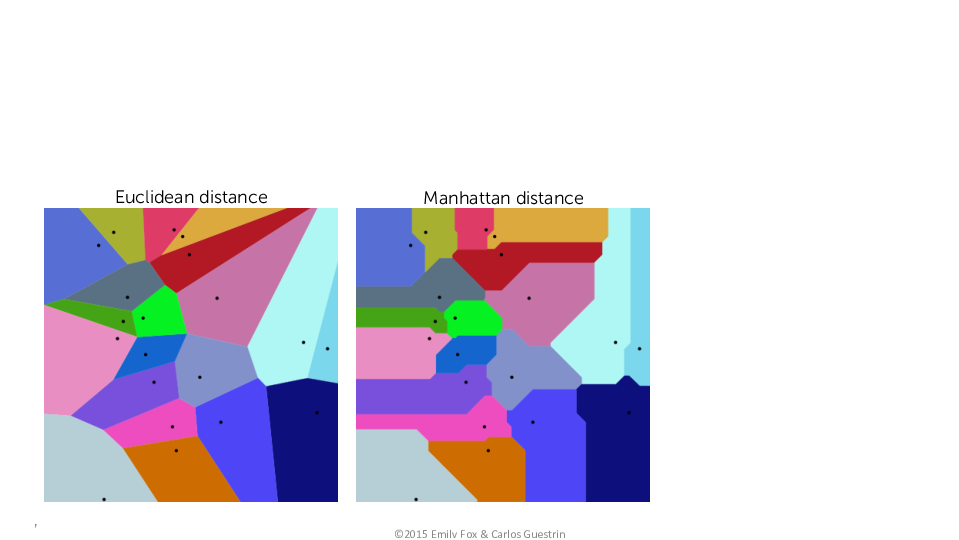

In [255]:
WImage(filename='KNN_distance.pdf')


In [334]:
def M_KNN(k,feature_matrix,query,output):
    a=[]
    for i in query:
        dist=np.sqrt(np.sum((i-feature_matrix)**2,axis=1))
        sorted_dist=np.argsort(dist)
        list_1=output[sorted_dist[:k]]
        b=Counter(list_1)
        a.append(b.most_common(1)[0][0])
        #a.append(np.mean(output[sorted_dist[:k]]))
    return np.rint(np.array(a))

Here, I am tuning the hyperparameter k. It is better to do 10-fold cross validation. I am only using 100 data sets instead of using ~8000 sets. 

In [335]:
predictions={}
for i in [4,6,10,20,30,40]:
    predictions[str(i)]=M_KNN(i,X_train,X_test[:100],y_train)

In [337]:
for i in [4,6,10,20,30,40]:
    RSS=sum((predictions[str(i)]-y_test[:100])**2)
    print(i,'======',RSS)

4 ====== 47.0
6 ====== 72.0
10 ====== 72.0
20 ====== 102.0
30 ====== 102.0
40 ====== 118.0


In [339]:
predictions={}
for i in [1,2,3]:
    predictions[str(i)]=M_KNN(i,X_train,X_test[:100],y_train)
    
for i in [1,2,3]:
    RSS=sum((predictions[str(i)]-y_test[:100])**2)
    print(i,'======',RSS)

1 ====== 56.0
2 ====== 27.0
3 ====== 52.0


In [268]:
predictions={}
for i in [8,9,10,11]:
    predictions[str(i)]=M_KNN(i,X_train,X_test[:100],y_train)
    
for i in [8,9,10,11]:
    RSS=sum((predictions[str(i)]-y_test[:100])**2)
    print(i,'======',RSS)

8 ====== 48.0
9 ====== 40.0
10 ====== 38.0
11 ====== 58.0


It looks like ** k = 10 ** would be the best.  I am not sure whether ** k =10 ** is the optimal value because ** Residual Sum of Square ( RSS )  ** is usually less sensitive to ** k value **. 

In [269]:
predictions=M_KNN(10,X_train,X_test,y_train) # This one will take about 30 mins to 1 hr. 

## Accuracy with L2

In [270]:
(predictions == y_test).sum()/len(y_test)*100

88.105726872246692

Here we will use ** L1 ( Mahattan Distance) **. 

In [331]:
def M_KNN2(k,feature_matrix,query,output):
    a=[]
    for i in query:
        dist=np.sum(np.abs(i-feature_matrix),axis=1)
        sorted_dist=np.argsort(dist)
        list_1=output[sorted_dist[:k]]
        b=Counter(list_1)
        
        a.append(b.most_common(1)[0][0])
        #a.append(np.mean(output[sorted_dist[:k]]))
    return np.rint(np.array(a))

In [332]:
M_KNN2(5,X_train,X_test[:10],y_train)

array([ 6.,  9.,  7.,  6.,  0.,  7.,  8.,  0.,  0.,  6.])

In [333]:
y_test[:10]

array([6, 9, 7, 6, 0, 7, 8, 0, 0, 6])

In [272]:
predictions={}
for i in [4,6,10,20,30,40]:
    predictions[str(i)]=M_KNN2(i,X_train,X_test[:100],y_train)
for i in [4,6,10,20,30,40]:
    RSS=sum((predictions[str(i)]-y_test[:100])**2)
    print(i,'======',RSS)

4 ====== 63.0
6 ====== 50.0
10 ====== 50.0
20 ====== 60.0
30 ====== 76.0
40 ====== 68.0


In [273]:
predictions={}
for i in [7,8,9]:
    predictions[str(i)]=M_KNN2(i,X_train,X_test[:100],y_train)
for i in [7,8,9]:
    RSS=sum((predictions[str(i)]-y_test[:100])**2)
    print(i,'======',RSS)

7 ====== 51.0
8 ====== 56.0
9 ====== 57.0


In [274]:
predictions={}
for i in [50,60]:
    predictions[str(i)]=M_KNN2(i,X_train,X_test[:100],y_train)
for i in [50,60]:
    RSS=sum((predictions[str(i)]-y_test[:100])**2)
    print(i,'======',RSS)

50 ====== 56.0
60 ====== 80.0


In [275]:
predictions={}
for i in [5]:
    predictions[str(i)]=M_KNN2(i,X_train,X_test[:100],y_train)
for i in [5]:
    RSS=sum((predictions[str(i)]-y_test[:100])**2)
    print(i,'======',RSS)

5 ====== 63.0


In [276]:
predictions=M_KNN2(6,X_train,X_test,y_train)

## Accuracy with L1

In [277]:
(predictions == y_test).sum()/len(y_test)*100

87.891415644719601